[09:43:08] WARNING: not removing hydrogen atom without neighbors
[09:43:08] WARNING: not removing hydrogen atom without neighbors
[09:43:08] WARNING: not removing hydrogen atom without neighbors
[09:43:08] WARNING: not removing hydrogen atom without neighbors
[09:43:08] WARNING: not removing hydrogen atom without neighbors
[09:43:08] WARNING: not removing hydrogen atom without neighbors
[09:43:08] WARNING: not removing hydrogen atom without neighbors
[09:43:08] WARNING: not removing hydrogen atom without neighbors
[09:43:08] WARNING: not removing hydrogen atom without neighbors


Epoch 1/50, Training Loss = 0.6611220286491184, Training accuracy = 0.6638477801268499
Epoch 2/50, Training Loss = 0.6168055575707357, Training accuracy = 0.7019027484143763
Epoch 3/50, Training Loss = 0.6171593950907875, Training accuracy = 0.7019027484143763
Epoch 4/50, Training Loss = 0.617128051544372, Training accuracy = 0.7019027484143763
Epoch 5/50, Training Loss = 0.6170895032511327, Training accuracy = 0.7019027484143763
Epoch 6/50, Training Loss = 0.617057259410645, Training accuracy = 0.7019027484143763
Epoch 7/50, Training Loss = 0.6170110721245912, Training accuracy = 0.7019027484143763
Epoch 8/50, Training Loss = 0.6168051461270143, Training accuracy = 0.7019027484143763
Epoch 9/50, Training Loss = 0.6167838213928616, Training accuracy = 0.7019027484143763
Epoch 10/50, Training Loss = 0.6167555578612672, Training accuracy = 0.7019027484143763
Epoch 11/50, Training Loss = 0.6166980296186516, Training accuracy = 0.7019027484143763
Epoch 12/50, Training Loss = 0.616657970283

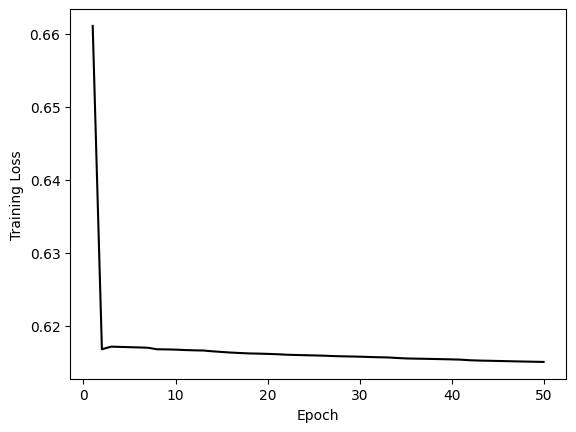

In [4]:
import pandas as pd
from Net import *
dataset = pd.read_csv("data/filtered_sider.csv")
#task = "Hepatobiliary disorders"
task = "Metabolism and nutrition disorders"
#task = "Pregnancy puerperium and perinatal conditions"
#task = "Renal and urinary disorders"
#task = "Injury poisoning and procedural complications"
#task = "Product issues"
#task = "Reproductive system and breast disorders"
network = [Sum_pooling(8),
           GIN(8),
           Sigmoid(),
           GIN(8),
           Sigmoid(),
           GIN(8),
           Sigmoid(),
           GIN(8),
           Sigmoid(),
           GIN(8),
           Sigmoid(),
           GlobalMeanPooling(),
           Dense(8,100),
           Convolution(100,3),
           BatchNorm(eps = 1e-5, momentum = 0.8, batch_size = 32),
           ReLU(),
           Convolution(98,3),
           BatchNorm(eps = 1e-5, momentum = 0.8, batch_size = 32),
           ReLU(),
           Convolution(96,3),
           BatchNorm(eps = 1e-5, momentum = 0.8, batch_size = 32),
           ReLU(),
           Dense(94,1),
           Sigmoid()           
]


MBGD(network, binary_cross_entropy, binary_cross_entropy_prime, dataset, task, epochs = 50,
       learning_rate = 0.05, batch_size = 32, verbose = True)